# Agregación de datos por categoría

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
gender = ["Male","Female"]
income = ["Poor","Middle Class", "Rich"]

In [4]:
n=500

gender_data = []
income_data = []

for i in range(0,n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [5]:
income_data[1:10]

['Middle Class',
 'Middle Class',
 'Rich',
 'Middle Class',
 'Rich',
 'Rich',
 'Middle Class',
 'Poor',
 'Middle Class']

In [6]:
gender_data[1:10]

['Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male']

In [7]:
#N(m,s) -> m+s*z
height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.randn(n)

In [8]:
data = pd.DataFrame(
{
    "Gender": gender_data,
    "Economic Status": income_data,
    "Height": height,
    "Weight": weight,
    "Age": age,
    "Income": income
}
)

In [9]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Middle Class,117.781557,97.834272,14.938084,17920.280966
1,Female,Middle Class,197.562254,77.290039,52.582434,21277.683092
2,Male,Middle Class,169.318207,92.244197,27.625656,15468.020544
3,Male,Rich,153.592959,70.243792,41.525063,16939.898258
4,Male,Middle Class,222.186635,119.904162,10.787840,18540.679655


Para hacer una agraupación de datos al mismo DF hay que hacerle un groupBy

In [10]:
groped_gender = data.groupby("Gender")

In [11]:
groped_gender.groups

{'Female': Int64Index([  1,   5,   7,  12,  14,  16,  17,  19,  20,  21,
             ...
             484, 486, 489, 490, 492, 494, 496, 497, 498, 499],
            dtype='int64', length=254),
 'Male': Int64Index([  0,   2,   3,   4,   6,   8,   9,  10,  11,  13,
             ...
             471, 476, 482, 483, 485, 487, 488, 491, 493, 495],
            dtype='int64', length=246)}

In [12]:
for names, groups in groped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height      Weight        Age        Income
1    Female    Middle Class  197.562254   77.290039  52.582434  21277.683092
5    Female            Rich  167.512011   48.817092  45.698347  19918.387697
7    Female    Middle Class  163.907926   62.567780  39.643636  17031.478808
12   Female    Middle Class  145.003603   85.634519 -10.617174  20183.243171
14   Female    Middle Class  170.160167   95.531053   8.194501  18887.120561
..      ...             ...         ...         ...        ...           ...
494  Female            Poor  119.231952  113.363784  57.312663  13448.948926
496  Female            Poor  187.528037   82.404516  18.529947  22187.561070
497  Female    Middle Class  178.123925   86.843404  40.600850  20907.746694
498  Female            Poor  179.871374   72.779608  38.477364  23164.137941
499  Female    Middle Class  143.008219   45.425839  40.433941  11414.287674

[254 rows x 6 columns]
Male
    Gender Economic Status      Height  

In [13]:
groped_gender.get_group("Female")

,Gender,Economic Status,Height,Weight,Age,Income
1,Female,Middle Class,197.562254,77.290039,52.582434,21277.683092
5,Female,Rich,167.512011,48.817092,45.698347,19918.387697
7,Female,Middle Class,163.907926,62.567780,39.643636,17031.478808
12,Female,Middle Class,145.003603,85.634519,-10.617174,20183.243171
14,Female,Middle Class,170.160167,95.531053,8.194501,18887.120561
...,...,...,...,...,...,...
494,Female,Poor,119.231952,113.363784,57.312663,13448.948926
496,Female,Poor,187.528037,82.404516,18.529947,22187.561070
497,Female,Middle Class,178.123925,86.843404,40.600850,20907.746694
498,Female,Poor,179.871374,72.779608,38.477364,23164.137941


In [14]:
double_group = data.groupby(["Gender","Economic Status"])

In [16]:
len(double_group)

6

In [17]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height     Weight        Age        Income
1    Female    Middle Class  197.562254  77.290039  52.582434  21277.683092
7    Female    Middle Class  163.907926  62.567780  39.643636  17031.478808
12   Female    Middle Class  145.003603  85.634519 -10.617174  20183.243171
14   Female    Middle Class  170.160167  95.531053   8.194501  18887.120561
21   Female    Middle Class  166.403749  62.345164  18.201873  21030.027307
..      ...             ...         ...        ...        ...           ...
478  Female    Middle Class  164.083950  64.101798  43.310966  19734.886618
490  Female    Middle Class  173.995570  64.192538  27.277418  20029.218271
492  Female    Middle Class  173.180930  41.071367  39.660323  17529.114811
497  Female    Middle Class  178.123925  86.843404  40.600850  20907.746694
499  Female    Middle Class  143.008219  45.425839  40.433941  11414.287674

[97 rows x 6 columns]
('Female', 'Poor')
     Gender Economi

## Operaciones sobre datos agrupados

In [18]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     15550.428423  6592.144470  3075.963912  1.759266e+06
       Poor             12779.222750  5139.052411  2502.247794  1.364277e+06
       Rich             12596.454537  4988.760558  2228.886811  1.465847e+06
Male   Middle Class     14593.809829  5929.967389  2676.415519  1.604150e+06
       Poor             12579.158576  5285.330768  2500.292034  1.415310e+06
       Rich             12285.737631  4923.566421  2317.624821  1.378903e+06

In [19]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     160.313695  67.960252  31.710968  18136.764604
       Poor             163.836189  65.885287  32.080100  17490.734696
       Rich             159.448792  63.148868  28.213757  18555.031176
Male   Middle Class     162.153443  65.888527  29.737950  17823.885031
       Poor             161.271264  67.760651  32.055026  18145.005377
       Rich             157.509457  63.122646  29.713139  17678.238250

In [20]:
double_group.size()

Gender  Economic Status
Female  Middle Class       97
        Poor               78
        Rich               79
Male    Middle Class       90
        Poor               78
        Rich               78
dtype: int64

In [21]:
double_group.describe()

Height                                                 \
                        count        mean        std         min         25%   
Gender Economic Status                                                         
Female Middle Class      97.0  160.313695  25.956750   85.745193  146.434268   
       Poor              78.0  163.836189  32.013639  101.821158  140.433935   
       Rich              79.0  159.448792  34.310398   64.923858  139.634285   
Male   Middle Class      90.0  162.153443  33.588015   94.118289  139.970463   
       Poor              78.0  161.271264  30.358819   73.810729  142.017737   
       Rich              78.0  157.509457  32.449338   75.518593  133.734464   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     160.625926  174.714124  231.704634   97.0  67.960252   
       Poor             163.764663  182.662308  242.169684   78.0  65.885287   
       Rich             160.980358  182.338420  239.398762   79.0  63.148868   
Male   Middle Class     161.678299  187.130300  249.322550   90.0  65.888527   
       Poor             163.919197  180.705409  246.486069   78.0  67.760651   
       Rich             159.978552  179.437431  216.536516   78.0  63.122646   

                        ...        Age            Income                \
                        ...        75%        max  count          mean   
Gender Economic Status  ...                                              
Female Middle Class     ...  41.147524  63.406330   97.0  18136.764604   
       Poor             ...  38.972874  65.087106   78.0  17490.734696   
       Rich             ...  36.495076  55.003883   79.0  18555.031176   
Male   Middle Class     ...  37.720629  56.928013   90.0  17823.885031   
       Poor             ...  38.907165  62.245395   78.0  18145.005377   
       Rich             ...  40.370752  62.547546   78.0  17678.238250   

                                                                               \
                                std           min           25%           50%   
Gender Economic Status                                                          
Female Middle Class     3492.374896   9913.314147  15905.637646  18115.014906   
       Poor             3846.931373   6231.585805  14747.325667  17290.541672   
       Rich             3481.600615  10577.940570  16307.640867  18553.490794   
Male   Middle Class     2881.366954   8448.719961  16305.401138  17947.721941   
       Poor             3644.317953  10947.627789  15035.657228  17945.628696   
       Rich             3351.464180  10254.175806  14879.974013  17411.470630   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     20305.923396  25973.373233  
       Poor             20500.003176  24880.488999  
       Rich             20804.769368  26077.296551  
Male   Middle Class     19534.763943  27370.589105  
       Poor             20647.736381  28081.312795  
       Rich             20552.968179  24618.954783  

[6 rows x 32 columns]

In [22]:
grouped_income = double_group["Income"]

In [23]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      97.0  18136.764604  3492.374896   9913.314147   
       Poor              78.0  17490.734696  3846.931373   6231.585805   
       Rich              79.0  18555.031176  3481.600615  10577.940570   
Male   Middle Class      90.0  17823.885031  2881.366954   8448.719961   
       Poor              78.0  18145.005377  3644.317953  10947.627789   
       Rich              78.0  17678.238250  3351.464180  10254.175806   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     15905.637646  18115.014906  20305.923396  25973.373233  
       Poor             14747.325667  17290.541672  20500.003176  24880.488999  
       Rich             16307.640867  18553.490794  20804.769368  26077.296551  
Male   Middle Class     16305.401138  17947.721941  19534.763943  27370.589105  
       Poor             15035.657228  17945.628696  20647.736381  28081.312795  
       Rich             14879.974013  17411.470630  20552.968179  24618.954783

In [25]:
double_group.aggregate(
    {
        "Income": np.sum,
        "Age": np.mean,
        "Height": np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.759266e+06  31.710968  25.956750
       Poor             1.364277e+06  32.080100  32.013639
       Rich             1.465847e+06  28.213757  34.310398
Male   Middle Class     1.604150e+06  29.737950  33.588015
       Poor             1.415310e+06  32.055026  30.358819
       Rich             1.378903e+06  29.713139  32.449338

In [26]:
double_group.aggregate(
    {
        "Age": np.mean,
        "Height": lambda h:np.mean(h)/np.std(h)
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     31.710968  6.208270
       Poor             32.080100  5.150824
       Rich             28.213757  4.676939
Male   Middle Class     29.737950  4.854764
       Poor             32.055026  5.346555
       Rich             29.713139  4.885429

In [28]:
double_group.aggregate([np.sum,np.mean,np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     15550.428423  160.313695  25.956750  6592.144470   
       Poor             12779.222750  163.836189  32.013639  5139.052411   
       Rich             12596.454537  159.448792  34.310398  4988.760558   
Male   Middle Class     14593.809829  162.153443  33.588015  5929.967389   
       Poor             12579.158576  161.271264  30.358819  5285.330768   
       Rich             12285.737631  157.509457  32.449338  4923.566421   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     67.960252  26.289924  3075.963912  31.710968   
       Poor             65.885287  24.167971  2502.247794  32.080100   
       Rich             63.148868  27.857528  2228.886811  28.213757   
Male   Middle Class     65.888527  23.514172  2676.415519  29.737950   
       Poor             67.760651  19.997313  2500.292034  32.055026   
       Rich             63.122646  23.873697  2317.624821  29.713139   

                                         Income                             
                              std           sum          mean          std  
Gender Economic Status                                                      
Female Middle Class     12.392995  1.759266e+06  18136.764604  3492.374896  
       Poor             12.615584  1.364277e+06  17490.734696  3846.931373  
       Rich             11.037465  1.465847e+06  18555.031176  3481.600615  
Male   Middle Class     12.020832  1.604150e+06  17823.885031  2881.366954  
       Poor             10.846491  1.415310e+06  18145.005377  3644.317953  
       Rich             12.845652  1.378903e+06  17678.238250  3351.464180

In [29]:
double_group.aggregate([lambda x: np.mean(x)/np.std(x)])

Height    Weight       Age    Income
                        <lambda>  <lambda>  <lambda>  <lambda>
Gender Economic Status                                        
Female Middle Class     6.208270  2.598459  2.572074  5.220225
       Poor             5.150824  2.743786  2.559354  4.576100
       Rich             4.676939  2.281336  2.572515  5.363509
Male   Middle Class     4.854764  2.817775  2.487727  6.220568
       Poor             5.346555  3.410420  2.974465  5.011212
       Rich             4.885429  2.661138  2.328061  5.308922

## Filtrado de datos

In [30]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     15550.428423  6592.144470  3075.963912  1.759266e+06
       Poor             12779.222750  5139.052411  2502.247794  1.364277e+06
       Rich             12596.454537  4988.760558  2228.886811  1.465847e+06
Male   Middle Class     14593.809829  5929.967389  2676.415519  1.604150e+06
       Poor             12579.158576  5285.330768  2500.292034  1.415310e+06
       Rich             12285.737631  4923.566421  2317.624821  1.378903e+06

In [37]:
double_group["Age"].filter(lambda x: x.sum()>2400)

0      14.938084
1      52.582434
2      27.625656
4      10.787840
7      39.643636
         ...    
495    46.525653
496    18.529947
497    40.600850
498    38.477364
499    40.433941
Name: Age, Length: 343, dtype: float64

## Transformación de variables

In [39]:
zscore = lambda x : (x - x.mean())/x.std()

In [40]:
double_group.transform(zscore)

,Height,Weight,Age,Income
0,-1.321063,1.358574,-1.231185,0.033455
1,1.435024,0.354881,1.684134,0.899365
2,0.213313,1.120842,-0.175719,-0.817620
3,-0.120696,0.298284,0.919527,-0.220304
4,1.787340,2.297152,-1.576439,0.248769
...,...,...,...,...
495,-0.284128,0.837688,1.396551,1.386706
496,0.740055,0.683517,-1.074081,1.220928
497,0.686150,0.718266,0.717331,0.793438
498,0.500886,0.285267,0.507092,1.474787


In [41]:
z_group=double_group.transform(zscore)

(array([  1.,   2.,  26.,  54., 115., 111.,  98.,  61.,  23.,   9.]),
 array([-3.41548926, -2.79559806, -2.17570686, -1.55581566, -0.93592446,
        -0.31603325,  0.30385795,  0.92374915,  1.54364035,  2.16353155,
         2.78342276]),
 <a list of 10 Patch objects>)

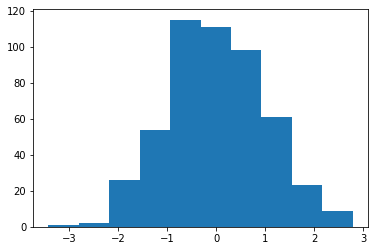

In [43]:
plt.hist(z_group["Age"])

In [44]:
fill_na_mean = lambda x: x.fillna(x.mean())

In [45]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,117.781557,97.834272,14.938084,17920.280966
1,197.562254,77.290039,52.582434,21277.683092
2,169.318207,92.244197,27.625656,15468.020544
3,153.592959,70.243792,41.525063,16939.898258
4,222.186635,119.904162,10.787840,18540.679655
...,...,...,...,...
495,152.610146,85.586056,46.525653,21819.493822
496,187.528037,82.404516,18.529947,22187.561070
497,178.123925,86.843404,40.600850,20907.746694
498,179.871374,72.779608,38.477364,23164.137941


## Operaciones diversas muy utiles

In [46]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Middle Class,117.781557,97.834272,14.938084,17920.280966
1,Female,Middle Class,197.562254,77.290039,52.582434,21277.683092
3,Male,Rich,153.592959,70.243792,41.525063,16939.898258
5,Female,Rich,167.512011,48.817092,45.698347,19918.387697
8,Male,Poor,167.877983,56.204792,14.285256,14353.086477
19,Female,Poor,101.821158,51.910202,37.700344,16701.038986


In [47]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
471,Male,Poor,174.411053,90.589995,52.347500,18928.195337
486,Female,Rich,182.009445,25.806820,20.989333,18295.843847
493,Male,Rich,177.399772,80.431485,24.696225,20755.318312
495,Male,Middle Class,152.610146,85.586056,46.525653,21819.493822
498,Female,Poor,179.871374,72.779608,38.477364,23164.137941
499,Female,Middle Class,143.008219,45.425839,40.433941,11414.287674


In [48]:
double_group.nth(32)

Height      Weight        Age        Income
Gender Economic Status                                                 
Female Middle Class     165.660596   79.368295  32.391589  24238.487561
       Poor             154.903585   68.161266  27.618479  20254.994835
       Rich             146.808386  108.529841  12.287362  20847.421441
Male   Middle Class      99.282493   20.249479  34.551654  19096.059365
       Poor             128.212433   35.322484  45.086927  23974.531383
       Rich             114.543471   48.730390  23.653645  15669.730612

In [49]:
double_group.nth(82)

,,Height,Weight,Age,Income
Gender,Economic Status,,,,
Female,Middle Class,158.561548,44.653174,36.592865,18028.957671
Male,Middle Class,163.488724,92.179482,49.268251,13366.098208


In [50]:
data_sorted = data.sort_values(["Age","Income"])

In [51]:
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
12,Female,Middle Class,145.003603,85.634519,-10.617174,20183.243171
362,Female,Middle Class,152.641595,68.767897,0.144825,19247.015447
154,Male,Middle Class,198.816925,51.973683,3.591687,23870.613419
160,Male,Middle Class,158.641128,55.441429,3.807727,15540.789379
422,Female,Rich,135.463938,-2.649367,3.814452,23814.867758
123,Female,Poor,128.752495,45.784846,4.818694,11647.835994
64,Female,Rich,160.577429,86.028233,5.066666,11126.454804
229,Female,Rich,91.642661,82.278479,5.965792,20060.230102
431,Male,Rich,181.486432,64.432309,6.005709,19539.272483
183,Female,Poor,104.725378,55.401721,6.892371,17046.433083


In [52]:
age_grouped = data_sorted.groupby("Gender")

In [55]:
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
12,Female,Middle Class,145.003603,85.634519,-10.617174,20183.243171
154,Male,Middle Class,198.816925,51.973683,3.591687,23870.613419


In [54]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
268,Male,Rich,180.629431,69.546060,62.547546,16309.257149
333,Female,Poor,242.169684,85.146997,65.087106,17534.650262


## Conjunto de entrenamiento y conjunto de testing

In [56]:
data = pd.read_csv("../../python-ml-course/datasets/customer-churn-model/Customer Churn Model.txt")

In [57]:
len(data)

3333

## Dividir utilizando la distribución normal

In [58]:
a = np.random.randn(len(data))

(array([ 15.,  78., 251., 616., 853., 764., 500., 201.,  44.,  11.]),
 array([-3.27209535, -2.60275109, -1.93340684, -1.26406258, -0.59471832,
         0.07462594,  0.74397019,  1.41331445,  2.08265871,  2.75200297,
         3.42134722]),
 <a list of 10 Patch objects>)

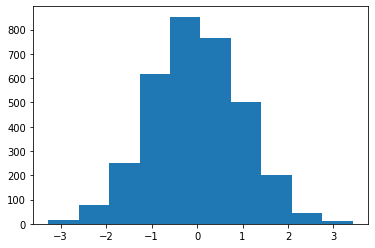

In [59]:
plt.hist(a)

In [76]:
check = (a<0.78)

In [77]:
check

array([ True,  True,  True, ...,  True,  True,  True])

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

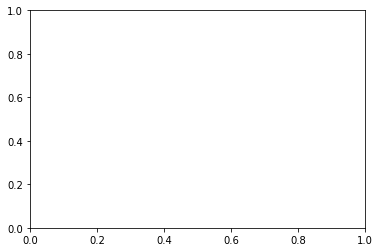

In [83]:
plt.hist(check)

In [79]:
training = data[check]
testing = data[~check]

In [80]:
len(training)

2617

In [81]:
len(testing)

716

## Con la libreria SKLEARN

In [88]:
train, test = train_test_split(data,test_size = 0.2)

In [89]:
len(train)

2666

In [90]:
len(test)

667

## Usando una función de shuffle

In [92]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [95]:
import sklearn

In [98]:
data = sklearn.utils.shuffle(data)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1605,IA,73,415,409-4462,no,no,0,137.1,102,23.31,...,114,17.92,191.4,120,8.61,11.1,4,3.00,1,False.
2753,OH,134,415,406-4158,no,no,0,7.8,86,1.33,...,100,14.57,186.5,80,8.39,12.9,2,3.48,2,False.
258,KS,92,408,386-4170,yes,no,0,62.6,111,10.64,...,126,15.35,221.7,80,9.98,10.4,2,2.81,1,True.
3094,MN,91,415,382-9297,no,no,0,133.8,61,22.75,...,96,13.50,189.6,92,8.53,10.5,2,2.84,1,False.
2054,NH,90,408,393-7322,no,no,0,140.2,97,23.83,...,102,18.18,120.0,126,5.40,7.1,2,1.92,1,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2839,SC,112,415,363-8033,no,no,0,266.0,97,45.22,...,94,18.24,306.2,100,13.78,14.2,2,3.83,2,True.
3242,MA,58,415,359-2740,no,yes,30,178.1,111,30.28,...,109,20.12,264.0,118,11.88,8.4,2,2.27,0,False.
2598,TN,196,415,340-8291,no,no,0,133.1,80,22.63,...,120,17.55,221.6,96,9.97,10.3,8,2.78,1,False.
3074,WV,113,510,386-6408,no,no,0,72.5,88,12.33,...,112,17.34,117.9,118,5.31,6.6,3,1.78,1,False.


In [99]:
cut_id = int(0.75 *len(data))
train_data = data[:cut_id]
test_data = data[cut_id+1:]

In [100]:
len(train_data)

2499

In [101]:
len(test_data)

833